# Exercise 1
---

## Problem: 
1. Generate a 16x16-dim position encoding using an interweaved $sin$ and $cos$ functions: $B = \{ b_1,b_2,...,b_{16} \}$ where $b_i\,\epsilon\,\mathbb{R}^{16}$. Distribute the domain of 16-dim between $0$ to $2\pi$.

2. If $B$ is a set of basis vectors, are the vectors orthogonal? Orthonormal? If not, make the basis vectors orthogonal and orthonormal using  G-S method.

3. Generate a colored visualization of vectors in 1 and 2.

Reference: [https://github.com/jalammar/jalammar.github.io/tree/master/notebookes/transformer]

## Solution
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In line with the reference paper [Attention is ALl You Need](https://arxiv.org/abs/1706.03762) Section 3.5, positional encoding was defined using sine and cosine functions of different frequencies.

$$PE_{(pos,2i)} = \sin{\left(\frac{pos}{10000^{2i/d_{model}}}\right)}$$
$$PE_{(pos,2i+1)} = \cos{\left(\frac{pos}{10000^{2i/d_{model}}}\right)}$$

where $pos$ is the position and $i$ is the dimension. To interpret we apply the sine and cosine functions to the even and odd indices of the array containing our angles. For this exercise, we are to generate a $16 \times 16$ position encoding. 

In [12]:
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

In [13]:
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2]) 

  pos_encoding = angle_rads[np.newaxis, ...]
  return pos_encoding 

We define a function that orthonormalizes an input set of vectors using the [Gram-Schmidt Process](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process). This [video](https://www.youtube.com/watch?v=rHonltF77zI) gives a good explanation and visualization of the said process.

In [14]:
# straight from numpy
def gs(input_matrix):
    Q, R = np.linalg.qr(input_matrix)
    return Q

# more detailed 
def gram_schmidt(A):
    # https://www.youtube.com/watch?v=rHonltF77zI
    # https://gist.github.com/iizukak/1287876/edad3c337844fac34f7e56ec09f9cb27d4907cc7
    n = A.shape[1]
    for j in range(n):
        for k in range(j):
            A[:, j] -= np.dot(A[:, k], A[:, j]) * A[:, k]
        A[:, j] = A[:, j] / np.linalg.norm(A[:, j])
    return A

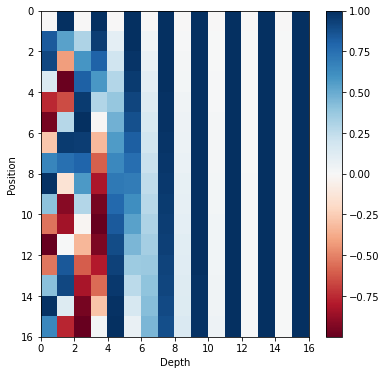

In [15]:
position = 16   
dimensions = 16 

pos_encoding = positional_encoding(position, dimensions)

plt.figure(figsize=(6,6))
plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, dimensions))
plt.ylim((position,0))
plt.ylabel('Position')
plt.colorbar()
plt.show()

We are then tasked to verify if the generated set of vectors are orthonormal. If not, we apply the orthonormalization function that we had defined earlier. Recall that $\vec{a}$ and $\vec{b}$ are _orthogonal_ if and only if $<\vec{a}$,$\vec{b}> = 0$. Additionaly, if the vectors are unit vectors, they are called _orthonormal_. Furthermore, a square matrix is an orthogonal matrix if and only if its columns are orthonormal such that $AA^T = I$. 

In [16]:
res_gs = gs(pos_encoding[0])

res = np.dot(res_gs,res_gs.T)

# uncomment succeeding lines to verify identity matrix of the dot product
# print(res)

# plt.figure(figsize=(6,6))
# plt.pcolormesh(res, cmap='RdBu')
# plt.xlabel('Depth')
# plt.xlim((0, dimensions))
# plt.ylim((position,0))
# plt.ylabel('Position')
# plt.colorbar()
# plt.show()

In [17]:
# if orthonormal, norm of each vector should be unity as well
res_1 = np.apply_along_axis(np.linalg.norm, 1, res)
print(res_1)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Finally, we generate a colored visualization of our orthonormalized set of vectors.

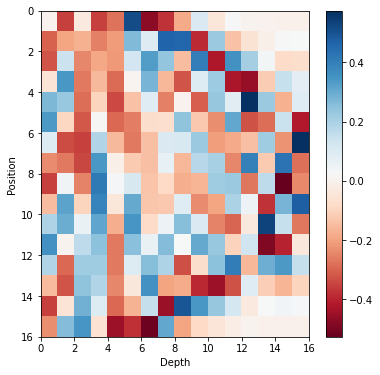

In [18]:
plt.figure(figsize=(6,6))
plt.pcolormesh(res_gs, cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, dimensions))
plt.ylim((position,0))
plt.ylabel('Position')
plt.colorbar()
plt.show()

---
## References
- [Mathematics for Machine Learning](https://mml-book.github.io/)
- [The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)
- [Transformer Architecture: The Positional Encoding](https://kazemnejad.com/blog/transformer_architecture_positional_encoding/#proposed-method)
- [Linear Relationships in the Transformer’s Positional Encoding](https://timodenk.com/blog/linear-relationships-in-the-transformers-positional-encoding/)